In [1]:
#importing dependancies
import os
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

#setting path for csv
csv_path = os.path.join("merged_audio_chart.csv")

#reading csv data into pandas df
audio_chart_data = pd.read_csv(csv_path)
display(audio_chart_data)

,song,artist,track_id,duration_s,energy,tempo,mode,time_signature,valence,key,...,Emotional Rating,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams
0,Back In Blood,Pooh Shiesty,7FGdjbZ32vMybPuP0IuE7d,184.490,0.538,146.933,0,4,0.831,8,...,highly emotionally positive,501.0,Pooh Shiesty,Back In Blood,283.0,7.0,9.0,0,718634.0,105011176.0
1,Sugar,Maroon 5,2iuZJX9X9P0GKaE93xcPjk,235.493,0.788,120.076,1,4,0.884,1,...,highly emotionally positive,502.0,Maroon 5,Sugar,478.0,67.0,1.0,(x5),667233.0,104864460.0
2,Blue Christmas,Elvis Presley,3QiAAp20rPC3dcAtKtMaqQ,129.173,0.270,94.518,1,4,0.580,4,...,emotionally positive,503.0,Elvis Presley,Blue Christmas,254.0,0.0,11.0,0,1959442.0,104768563.0
3,We Paid,Lil Baby,6gxKUmycQX7uyMwJcweFjp,181.929,0.542,135.140,1,4,0.564,1,...,emotionally positive,504.0,Lil Baby,We Paid,283.0,10.0,9.0,0,824708.0,104746275.0
4,Sleigh Ride,The Ronettes,5ASM6Qjiav2xPe7gRkQMsQ,181.267,0.772,91.751,1,4,0.853,2,...,highly emotionally positive,505.0,The Ronettes,Sleigh Ride,188.0,1.0,10.0,0,2784468.0,104353068.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,No Limit,Usher,1CDBn2Lm7E63XKQDsdCq6O,228.613,0.523,127.047,0,4,0.282,10,...,emotionally negative,1996.0,Usher,No Limit,130.0,0.0,99.0,0,201710.0,20235954.0
1488,Dick,StarBoi3,3nY8AqaMNNHHLYV4380ol0,175.238,0.608,125.994,1,4,0.474,9,...,emotionally negative,1997.0,StarBoi3,Dick,67.0,0.0,47.0,0,433652.0,20226932.0
1489,For You (Fifty Shades Freed) (& Rita Ora),Liam Payne,66xn6tB8s3l8uhj02OGneE,245.453,0.787,113.000,0,4,0.200,2,...,highly emotionally negative,1998.0,Liam Payne,For You (Fifty Shades Freed) (& Rita Ora),77.0,0.0,69.0,0,380810.0,20213273.0
1490,Rocking A Cardigan in Atlanta,lil Shordie Scott,0N0h5lXc4HOiLgGb9EZi8m,96.826,0.640,140.073,1,4,0.816,1,...,highly emotionally positive,1999.0,lil Shordie Scott,Rocking A Cardigan in Atlanta,61.0,0.0,27.0,0,464847.0,20201027.0


In [2]:
#setting variable names to be used in creation of scatterplot
tempo = audio_chart_data['tempo']
energy = audio_chart_data['energy']
size = audio_chart_data['Total Streams']/1000000
color = audio_chart_data['mode']
transparencey = audio_chart_data['valence']


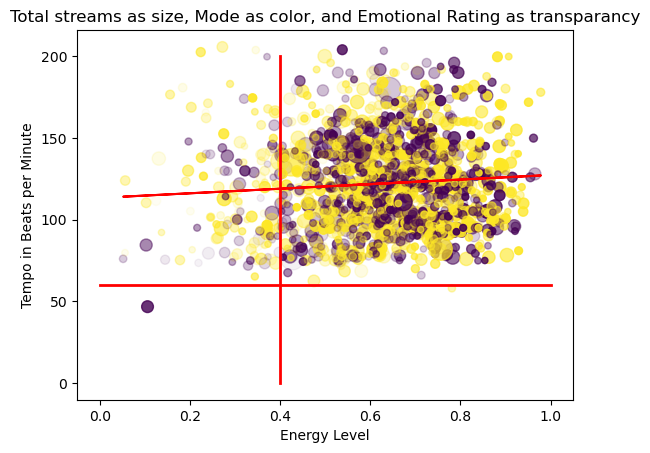

In [3]:
#scatterplot 1 creation
fig, ax = plt.subplots()
ax.scatter(energy, tempo, s=size, c=color, alpha=transparencey)
ax.set_ylabel("Tempo in Beats per Minute")
ax.set_xlabel("Energy Level")
ax.set_title("Total streams as size, Mode as color, and Emotional Rating as transparancy")
#adding lines to the scatterplot
line_x = [0, 1]
line_y = [60 , 60]
plt.plot(line_x, line_y, color='red', linestyle='solid', linewidth=2, label='Line of Interest')
line_x = [.4, .4]
line_y = [0 , 200]
plt.plot(line_x, line_y, color='red', linestyle='solid', linewidth=2, label='Line of Interest')
#regression line definitions
x = energy
y = tempo
slope, intercept, r_value, p_value, std_err = linregress(x, y)
# Plot the regression line
regression_line = slope * x + intercept
plt.plot(x, regression_line, color='red', label='Linear Regression')

In [56]:
#setting variable names to be used in creation of scatterplot
y_axis = audio_chart_data['valence']
x_axis = audio_chart_data['Peak Position']
size = audio_chart_data['Total Streams']/1000000
color = audio_chart_data['key']

Pearson Correlation Coefficient: 0.08
Pearson P-value: 0.0027
Spearman Correlation Coefficient: nan
Spearman P-value: nan


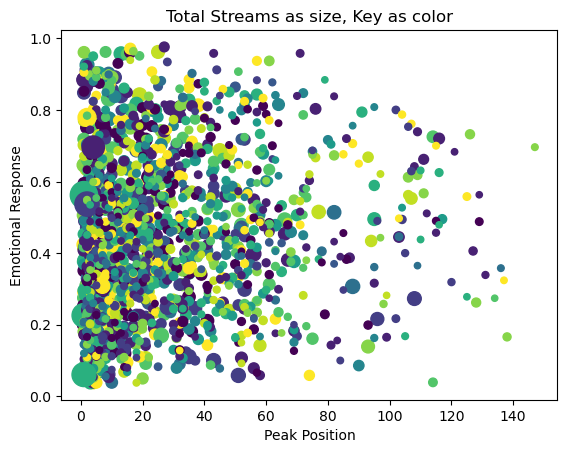

In [57]:
#creation of scatterplot
fig, ax = plt.subplots()
ax.scatter(x_axis, y_axis, s=size, c=color)
ax.set_ylabel("Emotional Response")
ax.set_xlabel("Peak Position")
ax.set_title("Total Streams as size, Key as color")

Text(0.5, 1.0, 'Mode as color')

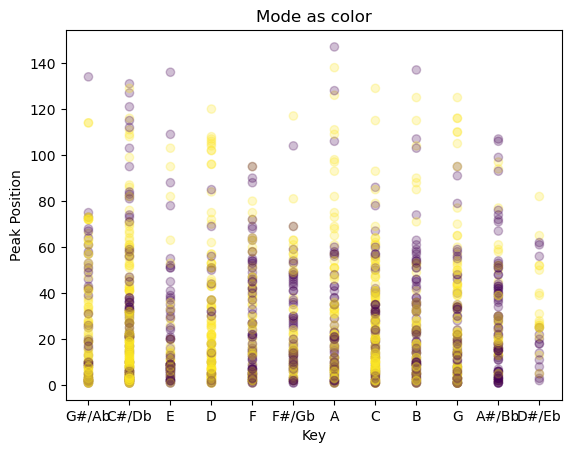

In [58]:
#setting variable names to be used in creation of scatterplot
y_axis = audio_chart_data['Peak Position']
x_axis = audio_chart_data['Key Signature']
color = audio_chart_data['mode']

#creation of scatterplot
fig, ax = plt.subplots()
ax.scatter(x_axis, y_axis, c=color, alpha=.25)
ax.set_ylabel("Peak Position")
ax.set_xlabel("Key")
ax.set_title("Mode as color")